
### 1. Read & clean up data

Datasets is open-source and were taken from https://huggingface.co/datasets/arkodeep/jobdata (english vacancies) and https://www.kaggle.com/datasets/vyacheslavpanteleev1/hhru-it-vacancies-from-20211025-to-20211202 (russian vacancies)


#### 1. Read

We do not need all the data in the tables, so will throw out some (most) of the columns. Also it is good idea to combine datasets


In [14]:
import pandas as pd

data_en = pd.read_csv('vacancies-skills_datasets/jobs_all.csv')
data_ru = pd.read_csv('vacancies-skills_datasets/IT_vacancies_full.csv')

In [15]:
data_en.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills', 'key_id'],
      dtype='object')

In [16]:
data_ru.columns

Index(['Ids', 'Employer', 'Name', 'Salary', 'From', 'To', 'Experience',
       'Schedule', 'Keys', 'Description', 'Area', 'Professional roles',
       'Specializations', 'Profarea names', 'Published at'],
      dtype='object')

In [17]:
data_en = data_en[['job_title','job_skills']]
data_ru = data_ru[['Name','Keys']]

In [18]:
data_en.head()

job_title  \
0  Senior Clinical Data Engineer / Principal Clin...   
1                                       Data Analyst   
2  Data Engineer/Scientist/Analyst, Mid or Senior...   
3  LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                             Data Engineer- Sr Jobs   

                                          job_skills  
0                                                NaN  
1  ['r', 'python', 'sql', 'nosql', 'power bi', 't...  
2  ['python', 'sql', 'c#', 'azure', 'airflow', 'd...  
3  ['python', 'c++', 'java', 'matlab', 'aws', 'te...  
4  ['bash', 'python', 'oracle', 'aws', 'ansible',...

In [19]:
data_ru.head()

Name  \
0          Golang Developer (–ö–∏–ø—Ä)   
1                –ï-mail –º–∞—Ä–∫–µ—Ç–æ–ª–æ–≥   
2  –û–ø–µ—Ä–∞—Ç–æ—Ä call-—Ü–µ–Ω—Ç—Ä–∞ (—É–¥–∞–ª–µ–Ω–Ω–æ)   
3           –í–µ–¥—É—â–∏–π SMM —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç   
4                   UX/UI Designer   

                                                Keys  
0  ['Docker', 'Golang', 'Redis', '–ê–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫...  
1  ['–ì—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç—å', '–ù–∞–ø–∏—Å–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤', '–ì—Ä–∞–º–æ—Ç–Ω–∞...  
2  ['–ö–ª–∏–µ–Ω—Ç–æ–æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å', '–û—Ä–∏–µ–Ω—Ç–∞—Ü–∏—è –Ω–∞ —Ä–µ...  
3  ['–ü—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–∞', '–ö—Ä–µ–∞—Ç–∏–≤–Ω–æ—Å—Ç—å', 'Adobe ...  
4  ['UI', 'UX', 'gamedev', 'game design', '–ø—Ä–æ–µ–∫—Ç...

In [20]:
data_ru.rename(columns = {'Name': 'job_title', 'Keys': 'job_skills'}, inplace = True)

data_combined = pd.concat([data_en, data_ru], ignore_index=True)
data_combined.head()

job_title  \
0  Senior Clinical Data Engineer / Principal Clin...   
1                                       Data Analyst   
2  Data Engineer/Scientist/Analyst, Mid or Senior...   
3  LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                             Data Engineer- Sr Jobs   

                                          job_skills  
0                                                NaN  
1  ['r', 'python', 'sql', 'nosql', 'power bi', 't...  
2  ['python', 'sql', 'c#', 'azure', 'airflow', 'd...  
3  ['python', 'c++', 'java', 'matlab', 'aws', 'te...  
4  ['bash', 'python', 'oracle', 'aws', 'ansible',...


#### 2. Clean up text

Transfer everything to the lower register, remove Nans and excess punctiation, convert skills into arrays etc

In [21]:
import re
import ast

data_combined = data_combined.dropna()
data_combined['job_skills'] = data_combined['job_skills'].apply(ast.literal_eval)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[-/()]', ' ', text)
    text = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø0-9+#+.]', ' ', text)
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_cell(cell):
    if isinstance(cell, list):
        return [clean_text(item) for item in cell if isinstance(item, str)]
    elif isinstance(cell, str):
        return clean_text(cell)
    else:
        return cell

for col in data_combined.columns:
    data_combined[col] = data_combined[col].apply(clean_cell)


In [22]:
data_combined.head(10)

job_title  \
1                                        data analyst   
2   data engineer scientist analyst mid or senior ...   
3   lead engineer principal analyst principal engi...   
4                               data engineer sr jobs   
5                                   gcp data engineer   
6                      senior data engineer gcp cloud   
7                                       data engineer   
8              technology operations business analyst   
9                                   data scientist ii   
10                 erfahrene r data engineer in m w d   

                                           job_skills  
1          [r, python, sql, nosql, power bi, tableau]  
2   [python, sql, c#, azure, airflow, dax, docker,...  
3   [python, c++, java, matlab, aws, tensorflow, k...  
4   [bash, python, oracle, aws, ansible, puppet, j...  
5                                  [python, sql, gcp]  
6   [sql, python, java, sql server, gcp, bigquery,...  
7   [sql, nosql, gcp, azure, aws, bigquery, databr...  
8                       [excel, powerpoint, power bi]  
9   [sql, python, r, mongodb, mongodb, sql server,...  
10                 [python, databricks, azure, spark]


### 3. Work with job titles
Plan is follows:
1. Remove stop-words
2. Start combining by using n-grams. They help to match patterns like 'pyhon developer' and 'developer python'
3. Create embeddings using sentence transformers or tf-idf
4. Apply clusterization to embeddings using dbscan or hdbscan or agglomerative clustering

#### 3.1 No stop words

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_en = set(stopwords.words('english'))
stop_words_ru = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [w for w in words if w not in stop_words_en and w not in stop_words_ru]
    return filtered_words

In [25]:
sentences = data_combined['job_title'].apply(remove_stopwords).tolist()

print(sentences[:10])
print(sentences[-10:])

[['data', 'analyst'], ['data', 'engineer', 'scientist', 'analyst', 'mid', 'senior', 'f', 'x'], ['lead', 'engineer', 'principal', 'analyst', 'principal', 'engineer', 'data...'], ['data', 'engineer', 'sr', 'jobs'], ['gcp', 'data', 'engineer'], ['senior', 'data', 'engineer', 'gcp', 'cloud'], ['data', 'engineer'], ['technology', 'operations', 'business', 'analyst'], ['data', 'scientist', 'ii'], ['erfahrene', 'r', 'data', 'engineer', 'w']]
[['–∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä', '–±–∞–∑', '–¥–∞–Ω–Ω—ã—Ö', 'database', 'administrator'], ['lead', 'data', 'scientist'], ['–∏–Ω–∂–µ–Ω–µ—Ä', '–∫–∞—Ç–µ–≥–æ—Ä–∏–∏'], ['—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç', '–ø–æ–¥–¥–µ—Ä–∂–∫–∏', '–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π'], ['—Å–∏—Å—Ç–µ–º–Ω—ã–π', '–∞–Ω–∞–ª–∏—Ç–∏–∫', 'dwh'], ['–º–æ–Ω—Ç–∞–∂–Ω–∏–∫', '—Å–ª–∞–±–æ—Ç–æ—á–Ω—ã—Ö', '—Å–∏—Å—Ç–µ–º'], ['—Å–∏—Å—Ç–µ–º–Ω—ã–π', '–∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä'], ['–º–µ–Ω–µ–¥–∂–µ—Ä', '—Ä–∞–±–æ—Ç–µ', '–º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–∞–º–∏', '–æ—Ñ–∏—Å'], ['–º–µ–Ω–µ–¥–∂–µ—Ä', '–ø—Ä–æ–¥–∞–∂–∞–º', '—Å–µ—Ä–≤–µ—Ä–Ω–æ–µ', '–æ–±–æ—Ä—É–

#### 3.2 N-gramms

* gensim - not cool
* Scikit-learn CountVectorizer - applied
* RAKE / TextRank / YAKE (Unsupervised Keyword Extractors) - not tried

##### gensim

In [26]:
# from gensim.models import Phrases
# from gensim.models.phrases import Phraser

In [27]:
# # create bi-gram model
# bigram_model = Phrases(sentences, min_count=2, threshold=1)
# # min_count=50 ‚Äî ignore pairs that apper <= 50 times
# # threshold=10 ‚Äî less phrazes
#
# bigram_model.add_vocab(sentences)
#
#
# bigram_phraser = Phraser(bigram_model)  # to fasten up


In [28]:
# data_combined['job_title_bigram'] = [bigram_phraser[sentence] for sentence in sentences]
#
# print(len(bigram_phraser.phrasegrams))
# print(list(bigram_phraser.phrasegrams)[:20])  # –ø–µ—Ä–≤—ã–µ 20 –±–∏–≥—Ä–∞–º–º


In [29]:
# data_combined.head(20)

##### count vectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=3)

In [31]:
texts = [' '.join(tokens) for tokens in sentences]
# text -> frequency matrix
X = vectorizer.fit_transform(texts)

# get bigrams and frequences
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

# to see
bigrams = vectorizer.get_feature_names_out()
bigram_freq = pd.DataFrame({'bigram': bigrams, 'count': counts})
bigram_freq = bigram_freq.sort_values(by='count', ascending=False)
print(bigram_freq.head(20))


                      bigram   count
10337          data engineer  182609
10106           data analyst  144815
10740         data scientist  137974
35841            senior data   70995
10732           data science   21799
36950      software engineer   15301
23428              lead data   15266
10118         data analytics   12603
24403       machine learning   11211
37743                sr data   11123
6494                big data   10615
6909        business analyst    9563
14128          engineer data    9115
6965   business intelligence    8519
22738            junior data    7911
10341       data engineering    7783
5714              azure data    7314
2004            analyst data    6490
23760      learning engineer    6483
6934           business data    6159


In [32]:
print(bigram_freq.head(20))

                      bigram   count
10337          data engineer  182609
10106           data analyst  144815
10740         data scientist  137974
35841            senior data   70995
10732           data science   21799
36950      software engineer   15301
23428              lead data   15266
10118         data analytics   12603
24403       machine learning   11211
37743                sr data   11123
6494                big data   10615
6909        business analyst    9563
14128          engineer data    9115
6965   business intelligence    8519
22738            junior data    7911
10341       data engineering    7783
5714              azure data    7314
2004            analyst data    6490
23760      learning engineer    6483
6934           business data    6159


In [33]:
def normalize_bigram_str(bigram):
    words = bigram.split()
    if len(words) == 2:
        return " ".join(sorted(words))
    return bigram

bigram_freq['bigram_normalized'] = bigram_freq['bigram'].apply(normalize_bigram_str)

bigram_freq_norm = bigram_freq.groupby('bigram_normalized', as_index=False)['count'].sum()
bigram_freq_norm = bigram_freq_norm.sort_values(by='count', ascending=False)

print(bigram_freq_norm.head(100))

       bigram_normalized   count
15655      data engineer  191724
3141        analyst data  151305
17061     data scientist  140094
17102        data senior   71258
17052       data science   22392
...                  ...     ...
12467      clinical data    1398
31509  machine scientist    1395
7262    associate senior    1393
3325    analyst engineer    1379
15973          data head    1368

[100 rows x 2 columns]


In [34]:
if 'job_title_bigram' in data_combined.columns:
    data_combined.drop(columns=['job_title_bigram'], inplace=True)

data_combined.head()

job_title  \
1                                       data analyst   
2  data engineer scientist analyst mid or senior ...   
3  lead engineer principal analyst principal engi...   
4                              data engineer sr jobs   
5                                  gcp data engineer   

                                          job_skills  
1         [r, python, sql, nosql, power bi, tableau]  
2  [python, sql, c#, azure, airflow, dax, docker,...  
3  [python, c++, java, matlab, aws, tensorflow, k...  
4  [bash, python, oracle, aws, ansible, puppet, j...  
5                                 [python, sql, gcp]

In [35]:
top_bigrams_set = set(bigram_freq['bigram_normalized'])

def extract_normalized_bigrams(text):
    words = re.findall(r'\w+', text.lower())
    pairs = set()
    for i in range(len(words) - 1):
        bigram = " ".join(sorted([words[i], words[i+1]]))
        if bigram in top_bigrams_set:
            pairs.add(bigram)
    return list(pairs)

data_combined['normalized_bigrams'] = data_combined['job_title'].apply(extract_normalized_bigrams)

In [36]:
data_combined.head()

job_title  \
1                                       data analyst   
2  data engineer scientist analyst mid or senior ...   
3  lead engineer principal analyst principal engi...   
4                              data engineer sr jobs   
5                                  gcp data engineer   

                                          job_skills  \
1         [r, python, sql, nosql, power bi, tableau]   
2  [python, sql, c#, azure, airflow, dax, docker,...   
3  [python, c++, java, matlab, aws, tensorflow, k...   
4  [bash, python, oracle, aws, ansible, puppet, j...   
5                                 [python, sql, gcp]   

                                  normalized_bigrams  
1                                     [analyst data]  
2  [analyst mid, data engineer, analyst scientist...  
3  [analyst principal, engineer principal, data e...  
4              [engineer sr, jobs sr, data engineer]  
5                          [data engineer, data gcp]

#### 3.3 Embeddings

Since we already get bigrams, better to use TF-IDF instead of SentenceTransformers. Also they are computationaly cheaper

In [37]:
data_combined.head()

job_title  \
1                                       data analyst   
2  data engineer scientist analyst mid or senior ...   
3  lead engineer principal analyst principal engi...   
4                              data engineer sr jobs   
5                                  gcp data engineer   

                                          job_skills  \
1         [r, python, sql, nosql, power bi, tableau]   
2  [python, sql, c#, azure, airflow, dax, docker,...   
3  [python, c++, java, matlab, aws, tensorflow, k...   
4  [bash, python, oracle, aws, ansible, puppet, j...   
5                                 [python, sql, gcp]   

                                  normalized_bigrams  
1                                     [analyst data]  
2  [analyst mid, data engineer, analyst scientist...  
3  [analyst principal, engineer principal, data e...  
4              [engineer sr, jobs sr, data engineer]  
5                          [data engineer, data gcp]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
bigrams_joined = data_combined['normalized_bigrams'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = vectorizer.fit_transform(bigrams_joined)

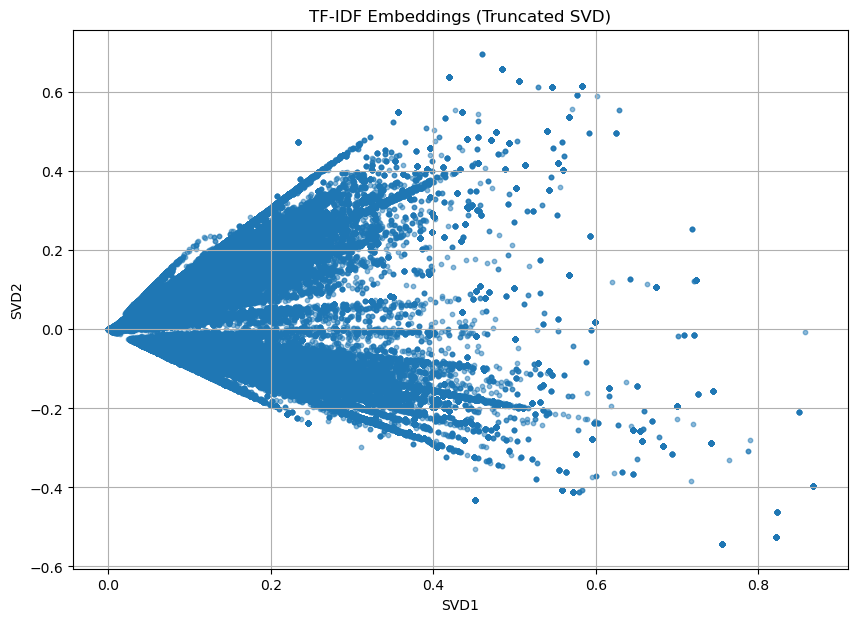

In [40]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd_plot = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd_plot.fit_transform(X_tfidf)

plt.figure(figsize=(10, 7))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5, s=10)
plt.title("TF-IDF Embeddings (Truncated SVD)")
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.grid(True)
plt.show()


X_TFIDF has a size (717268, 5000) - this is 3.5 billion elements (if in DENSE format).

After TRUNCATEDSVD (n_components = 100), the size will become (717268, 100) - many times smaller!

In [41]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)


In [42]:
X_reduced.shape

(717268, 100)

In [45]:
import numpy as np
np.save('X_reduced.npy', X_reduced)

#### 3.4 clusterization
Will use combination of k-means and birch


Firstly, create small sample to calibrate params

In [31]:
import numpy as np

np.random.seed(42)

# create small sample for param calibration
sample_size = int(0.05 * len(X_reduced))
sample_idx = np.random.choice(len(X_reduced), size=sample_size, replace=False)
X_sample = X_reduced[sample_idx]

Now choose the best params

Chhose optimal cluster number:
n_clusters=10: Silhouette score = 0.301
n_clusters=15: Silhouette score = 0.328
n_clusters=20: Silhouette score = 0.351
n_clusters=25: Silhouette score = 0.384
n_clusters=30: Silhouette score = 0.391
n_clusters=35: Silhouette score = 0.407
n_clusters=40: Silhouette score = 0.419
n_clusters=45: Silhouette score = 0.416
n_clusters=50: Silhouette score = 0.411


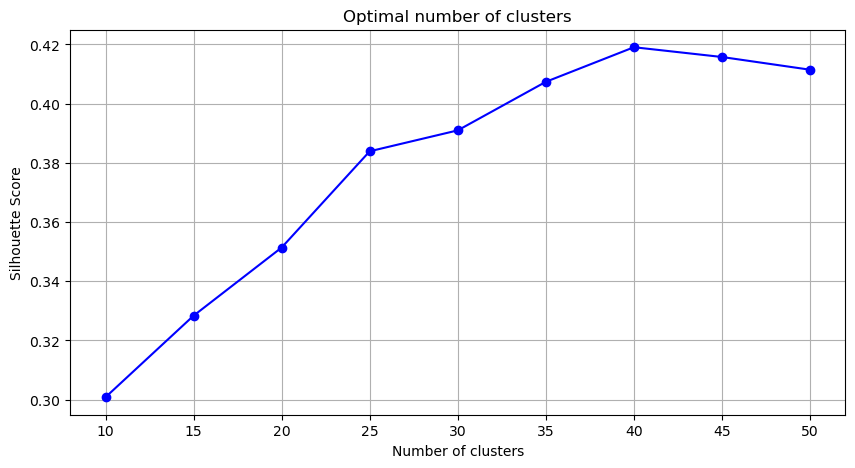


Best result: n_clusters=40 (score=0.419)


In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
cluster_range = range(10, 51, 5)

print("Chhose optimal cluster number:")
for n in cluster_range:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    scores.append(score)
    print(f"n_clusters={n}: Silhouette score = {score:.3f}")

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal number of clusters')
plt.grid(True)
plt.show()

best_n = cluster_range[np.argmax(scores)]
best_score = max(scores)
print(f"\nBest result: n_clusters={best_n} (score={best_score:.3f})")


In [38]:
final_kmeans = KMeans(n_clusters=best_n, random_state=42, n_init=10)
sample_labels = final_kmeans.fit_predict(X_sample)

sample_data = data_combined.iloc[sample_idx].copy()
sample_data['cluster'] = sample_labels

print("\nCluster examples:")
for cluster in sorted(sample_data['cluster'].unique()):
    cluster_jobs = sample_data[sample_data['cluster'] == cluster]['job_title'].values
    cluster_skills = sample_data[sample_data['cluster'] == cluster]['job_skills'].explode().value_counts().head(5)

    print(f"\nCluster {cluster} (size: {len(cluster_jobs)})")
    print("Typical vacancies:")
    print(np.unique(cluster_jobs)[:3])
    print("Top-5 skills:")
    print(cluster_skills)


Cluster examples:

Cluster 0 (size: 248)
Typical vacancies:
['analyst marketing' 'analyst marketing analytics'
 'analyst marketing innovation']
Top-5 skills:
job_skills
sql         147
tableau     101
excel        99
python       97
power bi     60
Name: count, dtype: int64

Cluster 1 (size: 3876)
Typical vacancies:
['1—Å analyst consultant' '3m data analyst ii san diego ca'
 '4cs4u data analyst cape cod community college']
Top-5 skills:
job_skills
sql         1962
excel       1742
python      1249
tableau     1041
power bi     842
Name: count, dtype: int64

Cluster 2 (size: 1179)
Typical vacancies:
['analytics senior data engineer' 'architecte data senior'
 'bl senior data engineer']
Top-5 skills:
job_skills
python    872
sql       825
aws       552
azure     459
spark     446
Name: count, dtype: int64

Cluster 3 (size: 2302)
Typical vacancies:
['0501wfh data scientist' 'adot data scientist' 'agile1 data scientist']
Top-5 skills:
job_skills
python     1934
sql        1334
r          

In [36]:
final_kmeans = KMeans(n_clusters=best_n, random_state=42)
data_combined['cluster'] = final_kmeans.fit_predict(X_reduced)

In [37]:
data_combined.head(10)

job_title  \
1                                        data analyst   
2   data engineer scientist analyst mid or senior ...   
3   lead engineer principal analyst principal engi...   
4                               data engineer sr jobs   
5                                   gcp data engineer   
6                      senior data engineer gcp cloud   
7                                       data engineer   
8              technology operations business analyst   
9                                   data scientist ii   
10                 erfahrene r data engineer in m w d   

                                           job_skills  \
1          [r, python, sql, nosql, power bi, tableau]   
2   [python, sql, c#, azure, airflow, dax, docker,...   
3   [python, c++, java, matlab, aws, tensorflow, k...   
4   [bash, python, oracle, aws, ansible, puppet, j...   
5                                  [python, sql, gcp]   
6   [sql, python, java, sql server, gcp, bigquery,...   
7   [sql, nosql, gcp, azure, aws, bigquery, databr...   
8                       [excel, powerpoint, power bi]   
9   [sql, python, r, mongodb, mongodb, sql server,...   
10                 [python, databricks, azure, spark]   

                                   normalized_bigrams  cluster  
1                                      [analyst data]        4  
2   [data engineer, analyst mid, engineer scientis...       10  
3   [data engineer, analyst principal, engineer le...       14  
4               [data engineer, engineer sr, jobs sr]       11  
5                           [data engineer, data gcp]       15  
6   [data senior, data engineer, cloud gcp, engine...       14  
7                                     [data engineer]        3  
8   [operations technology, analyst business, busi...       34  
9                      [data scientist, ii scientist]       10  
10                                    [data engineer]        3

In [42]:
# save dataframe
data_combined.to_pickle('clustered_vacancies_full.pkl')


In [20]:
import pandas as pd

try:
    data_clustered = pd.read_pickle('clustered_vacancies_full.pkl')
    print("All data successfully downloaded!")
except FileNotFoundError:
    print("No file exists, please do clusterization again :(")

All data successfully downloaded!


#### 3.5 Post-Clusterizarion

In [21]:
cluster_sizes = data_clustered['cluster'].value_counts()
print(cluster_sizes)

cluster
14    160491
3      61968
19     58324
1      47693
4      46386
10     44853
8      23217
20     18576
0      18434
11     17804
13     15656
15     14850
7      13740
12     11213
9      10546
5       9973
33      9799
37      8445
27      8386
18      8259
31      8103
17      8033
21      7967
24      7719
35      7004
16      6895
2       6203
28      5818
38      5469
6       5239
36      5175
25      5148
29      4551
23      4162
22      4022
34      3906
30      3659
32      3615
26      3353
39      2614
Name: count, dtype: int64


##### Too big clusters

If cluster is too big, there is a need to divide it

In [22]:
large_cluster_threshold = 50000
cluster_sizes = data_clustered['cluster'].value_counts()
big_clusters = cluster_sizes[cluster_sizes > large_cluster_threshold].index

for cluster in big_clusters:
    cluster_data = data_clustered[data_clustered['cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} records):")
    print("Top-5 vacancies:")
    print(cluster_data['job_title'].value_counts().head(5))
    print("\nTop-10 skills:")
    print(cluster_data['job_skills'].explode().value_counts().head(10))



Cluster 14 (160491 records):
Top-5 vacancies:
job_title
analyst                 884
qa engineer             632
data architect          621
database engineer       551
data quality analyst    498
Name: count, dtype: int64

Top-10 skills:
job_skills
sql         64251
python      53868
excel       27616
aws         23422
azure       21927
tableau     18513
java        17733
spark       15653
power bi    15615
r           14353
Name: count, dtype: int64

Cluster 3 (61968 records):
Top-5 vacancies:
job_title
data engineer          53677
data engineer h f       1389
data engineer m w d      530
data engineer f h        512
data engineer m f d      284
Name: count, dtype: int64

Top-10 skills:
job_skills
sql        44484
python     41611
aws        22598
azure      22576
spark      19599
java       12961
hadoop     10495
kafka      10440
scala      10331
airflow    10273
Name: count, dtype: int64

Cluster 19 (58324 records):
Top-5 vacancies:
job_title
marketing data analyst    970
financial

To identify whether it is worth to divide cluster, let's introduce **diversity** metric

**diversity** = 1 - (frequency of the most popular vacancy / total number of vacancies in a cluster)

* diversity <0.1 ‚Üí Closure is very homogeneous ‚Üí Do not divide

* 0.1 ‚â§ diversity <0.3 ‚Üí Moderate heterogeneity ‚Üí Divide optionally

* diversity ‚â• 0.3 ‚Üí Closure is very heterogeneous ‚Üí It is better to divide

In [23]:
diversity_scores = {}

for cluster in big_clusters:
    titles = data_clustered.loc[data_clustered['cluster'] == cluster, 'job_title']
    most_common = titles.value_counts().iloc[0]
    total = len(titles)
    diversity = 1 - (most_common / total)
    diversity_scores[cluster] = diversity


In [24]:
for cl, score in sorted(diversity_scores.items(), key=lambda x: -x[1]):
    print(f"Cluster {cl}: diversity = {score:.2f}")


Cluster 14: diversity = 0.99
Cluster 19: diversity = 0.98
Cluster 3: diversity = 0.13


In [25]:
# better to not touch it
big_clusters = [c for c in big_clusters if c != 3]

In [26]:
import numpy as np

X_reduced = np.load('X_reduced.npy')

In [27]:
from sklearn.cluster import MiniBatchKMeans

for cluster in big_clusters:
    mask = data_clustered['cluster'] == cluster
    X_cluster = X_reduced[mask]

    if len(X_cluster) < 1000:
        continue

    n_subclusters = max(2, len(X_cluster) // 5000)

    print(f"Cluster {cluster} ‚Üí divide to {n_subclusters} subclusters")

    kmeans = MiniBatchKMeans(n_clusters=n_subclusters, random_state=42, batch_size=1024)
    sub_labels = kmeans.fit_predict(X_cluster)

    data_clustered.loc[mask, 'cluster'] = sub_labels + (cluster * 100)


Cluster 14 ‚Üí divide to 32 subclusters
Cluster 19 ‚Üí divide to 11 subclusters


In [29]:
cluster_sizes = data_clustered['cluster'].value_counts()
print(cluster_sizes)

cluster
3       61968
1       47693
4       46386
10      44853
1422    38333
        ...  
1907     1097
1428     1022
1903      988
1431      835
1427      747
Name: count, Length: 81, dtype: int64


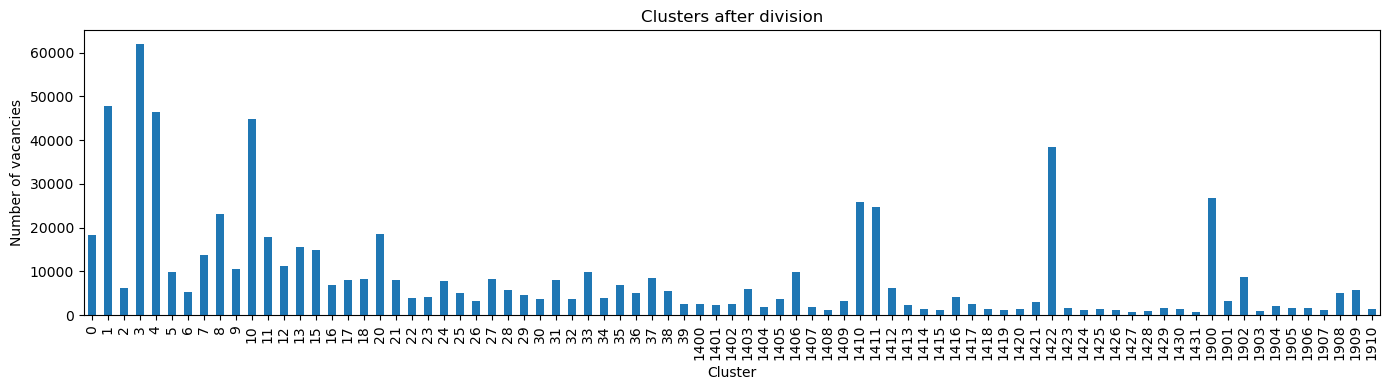

In [30]:
import matplotlib.pyplot as plt
data_clustered['cluster'].value_counts().sort_index().plot(kind='bar', figsize=(14, 4))
plt.title('Clusters after division')
plt.xlabel('Cluster')
plt.ylabel('Number of vacancies')
plt.tight_layout()
plt.show()


##### Too small clusters

In [31]:
cluster_sizes = data_clustered['cluster'].value_counts()
small_clusters = cluster_sizes[cluster_sizes < 2000]
print(small_clusters)


cluster
1404    1887
1407    1840
1429    1693
1423    1690
1905    1565
1906    1564
1420    1464
1910    1463
1430    1347
1418    1330
1425    1318
1414    1310
1426    1244
1419    1238
1408    1224
1415    1221
1424    1209
1907    1097
1428    1022
1903     988
1431     835
1427     747
Name: count, dtype: int64


In [33]:
total_records = len(data_clustered)
small_total = small_clusters.sum()
print(f"Small clusters (<2k): {len(small_clusters)}")
print(f"Total number of entries: {small_total} ({small_total / total_records:.2%} from all)")


Small clusters (<2k): 22
Total number of entries: 29296 (4.08% from all)


In [37]:
small_clusters = cluster_sizes[cluster_sizes < 2000].index

for cluster in small_clusters:
    cluster_data = data_clustered[data_clustered['cluster'] == cluster]

    print(f"\nCluster {cluster} ({len(cluster_data)} records):")
    print("Top-5 vacancies:")
    print(cluster_data['job_title'].value_counts().head(5))

    print("\nTop-10 skills:")
    print(cluster_data['job_skills'].explode().value_counts().head(10))



Cluster 1404 (1887 records):
Top-5 vacancies:
job_title
data architect             621
senior data architect      112
data engineer architect     92
data architect engineer     47
solution architect          29
Name: count, dtype: int64

Top-10 skills:
job_skills
sql           1045
azure          888
python         780
aws            687
spark          497
databricks     364
hadoop         329
kafka          319
java           308
snowflake      305
Name: count, dtype: int64

Cluster 1407 (1840 records):
Top-5 vacancies:
job_title
database engineer           551
senior database engineer    209
database analyst            187
senior database analyst      45
cloud database engineer      27
Name: count, dtype: int64

Top-10 skills:
job_skills
sql           1269
oracle         615
python         488
sql server     487
mongodb        484
postgresql     450
mysql          425
aws            396
azure          313
linux          295
Name: count, dtype: int64

Cluster 1429 (1693 records):
Top

Small clusters 1431 (marketing analyst) and 1428 (sales analyst) share similar skill sets (SQL, Excel, Tableau, Python) and overlapping job roles focused on data analysis in marketing and sales domains. Merging them makes sense to reduce fragmentation without losing meaningful distinctions.

In [38]:
data_clustered.loc[data_clustered['cluster'] == 1428, 'cluster'] = 1431

##### Visualization

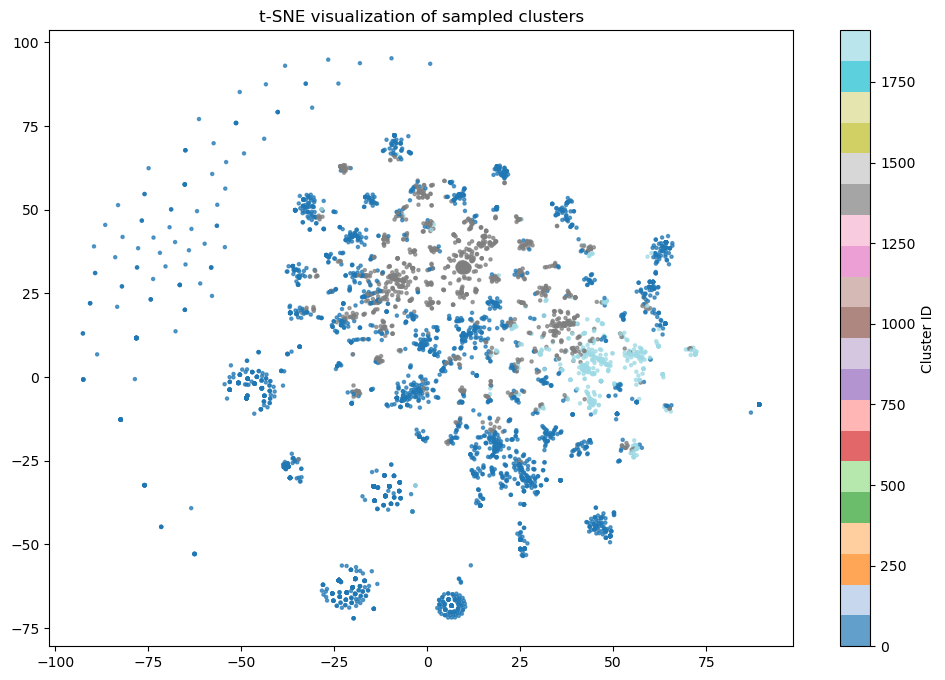

In [45]:
from sklearn.manifold import TSNE
import numpy as np

sample_idx = np.random.choice(len(X_reduced), size=5000, replace=False)
X_sample = X_reduced[sample_idx]
y_sample = data_clustered.iloc[sample_idx]['cluster']

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
embedding = tsne.fit_transform(X_sample)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=y_sample, cmap='tab20', s=5, alpha=0.7)
plt.colorbar(scatter, label='Cluster ID')
plt.title('t-SNE visualization of sampled clusters')
plt.show()


##### Report abt final clusters

In [46]:
import pandas as pd

cluster_summary = []
for cl in sorted(data_clustered['cluster'].unique()):
    cluster_data = data_clustered[data_clustered['cluster'] == cl]
    size = len(cluster_data)
    top_titles = cluster_data['job_title'].value_counts().head(5).to_dict()
    top_skills = cluster_data['job_skills'].explode().value_counts().head(10).to_dict()
    cluster_summary.append({'cluster': cl, 'size': size, 'top_titles': top_titles, 'top_skills': top_skills})

df_summary = pd.DataFrame(cluster_summary)
df_summary.to_csv('cluster_summary.csv', index=False)


In [50]:
df_summary.head()

cluster   size                                         top_titles  \
0        0  18434  {'data science': 787, 'data science manager': ...   
1        1  47693  {'data scientist': 40667, 'data scientist h f'...   
2        2   6203  {'cloud data engineer': 1156, 'cloud engineer'...   
3        3  61968  {'data engineer': 53677, 'data engineer h f': ...   
4        4  46386  {'data analyst': 38187, 'data analyst h f': 13...   

                                          top_skills  
0  {'python': 14798, 'sql': 9783, 'r': 7952, 'aws...  
1  {'python': 40347, 'sql': 27314, 'r': 21109, 't...  
2  {'python': 3604, 'aws': 3563, 'azure': 3424, '...  
3  {'sql': 44484, 'python': 41611, 'aws': 22598, ...  
4  {'sql': 30384, 'excel': 19216, 'python': 18287...

In [51]:
data_clustered.head()

job_title  \
1                                       data analyst   
2  data engineer scientist analyst mid or senior ...   
3  lead engineer principal analyst principal engi...   
4                              data engineer sr jobs   
5                                  gcp data engineer   

                                          job_skills  \
1         [r, python, sql, nosql, power bi, tableau]   
2  [python, sql, c#, azure, airflow, dax, docker,...   
3  [python, c++, java, matlab, aws, tensorflow, k...   
4  [bash, python, oracle, aws, ansible, puppet, j...   
5                                 [python, sql, gcp]   

                                  normalized_bigrams  cluster  
1                                     [analyst data]        4  
2  [data engineer, analyst mid, engineer scientis...       10  
3  [data engineer, analyst principal, engineer le...     1406  
4              [data engineer, engineer sr, jobs sr]       11  
5                          [data engineer, data gcp]       15

#### Rename clusters into vacancies

In [61]:
#28 divide
#1412

cluster_names = {
    #ds & ml
    1: 'data scientist',
    0: 'lead data scientist',

    9: 'machine learning engineer',
    1430: 'machine learning engineer',

    10:'middle data scientist',
    13: 'senior data scientist',
    15: 'junior data scientist',
    33: 'junior data scientist',
    # data engineering
    11: 'data engineer',
    1400: 'data engineer',
    1406: 'consulting data engineer',
    3: 'junior data engineer',
    8: 'senior data engineer',
    1427: 'senior data engineer',
    1416: 'middle data engineer',
    12: 'lead data engineer',
    27: 'lead data engineer',

    1418: 'associate data engineer',

    16: 'azure data engineer',
    31: 'big data engineer',
    30: 'aws data engineer',
    1426: 'data warehouse engineer',

    # data analyzis
    4: 'data analyst',
    1909: 'data analyst',
    1903: 'data analyst',
    1907: 'data analyst',
    1422: 'data analyst',
    1429: 'data analyst',
    1404: 'data architect',
    20: 'data analyst',
    18: 'data analyst',
    5: 'senior data analyst',
    26: 'senior data analyst',
    24: 'senior data analyst',
    1910: 'senior data analyst',
    1423: 'middle data analyst',
    1905: 'junior data analyst',

    1425: 'digital analyst',

    1405: 'data manager',
    1417: 'data manager',

    1419: 'data integration specialist',

    6: 'business data analyst',
    17: 'business data analyst',
    21: 'bi analyst',
    34: 'business data analyst',
    37: 'business data analyst',
    1415: 'business data analyst',
    36: 'system data analyst',
    1410: 'business data analyst',

    23: 'research analyst',
    29: 'technical writer',

    28: 'product analyst',
    38: 'product analyst',
    1424: 'data visualization',

    1902: 'clinical data analyst',
    1906: 'clinical data analyst',
    1908: 'clinical data analyst',

    1904: 'financial data analyst',
    1431: 'marketing data analyst',
    1900: 'marketing data analyst',
    1901: 'marketing data analyst',

    39: 'sap data analyst',

    # soft and devops
    1401:'qa engineer',
    1402:'qa engineer',
    7: 'software developer',
    22: 'data platform engineer',
    32: 'devops engineer',

    35: 'python developer',

    1403: 'technical support',
    1413: 'technical support',
    1421: 'technical support',


    1411: 'mlops dataops',

    1420: 'backend developer',

    1414: 'fullstack developer',

    2: 'cloud data engineer',

    25: 'principal data engineer',

    1407: 'database engineer',
    1408: 'governance data engineer',

}

# data_clustered['cluster_name'] = data_clustered['cluster'].map(cluster_names).fillna('Other')


##### Problem clusters division


In [72]:
X_reduced.shape

(717268, 100)

In [62]:
#28, 1412

problem_clusters = [28, 1412]
problem_data = data_clustered[data_clustered['cluster'].isin(problem_clusters)].copy()

In [70]:
import pprint
pp = pprint.PrettyPrinter(indent=4, width=100, compact=True)

for cluster in problem_clusters:
    cluster_data = problem_data[problem_data['cluster'] == cluster]

    print(f"\n{'='*50}")
    print(f"=== Analyzis of cluster {cluster} (n={len(cluster_data)}) ===")
    print(f"{'='*50}")

    print("\nüìå vacancies:")
    title_counts = cluster_data['job_title'].value_counts().head(20).to_dict()
    pp.pprint(title_counts)

    print("\nüîß skills:")
    skills = cluster_data['job_skills'].explode()
    skill_counts = skills.value_counts().head(20).to_dict()
    pp.pprint(skill_counts)


=== Analyzis of cluster 28 (n=5818) ===

üìå vacancies:
{   '.net —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 25,
    'android —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 101,
    'backend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 42,
    'frontend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 228,
    'frontend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ angular': 28,
    'frontend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ react': 42,
    'frontend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ vue.js': 26,
    'full stack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 22,
    'fullstack —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 22,
    'ios —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 116,
    'java —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 245,
    'php —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 106,
    'python —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 66,
    'web —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 55,
    '–≤–µ–¥—É—â–∏–π —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ 1—Å': 27,
    '–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 33,
    '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ 1—Å': 60,
    '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ android': 22,
    '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ java': 25,
    '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ python': 43}

üîß skills:
{   'c#': 364,
    'css': 522,
    'css3': 305,
    'd

In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def find_best_n(X, min_k=2, max_k=10):
    best_score = -1
    best_k = min_k
    for k in range(min_k, min(max_k, len(X))):
        labels = AgglomerativeClustering(n_clusters=k).fit_predict(X)
        if len(set(labels)) < 2:
            continue
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

for cluster_id in problem_clusters:
    mask = data_clustered['cluster'] == cluster_id
    X_sub = X_reduced[mask]

    best_k = find_best_n(X_sub)
    labels = AgglomerativeClustering(n_clusters=best_k).fit_predict(X_sub)

    offset = cluster_id * 100
    data_clustered.loc[mask, 'cluster'] = labels + offset


C:\Users\user\AppData\Local\Temp\ipykernel_1912\2194355022.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2800 2800 2800 ... 2800 2800 2800]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data_clustered.loc[mask, 'cluster'] = labels + offset


In [75]:
for base_cluster in [28, 1412]:
    print(f"\n===== Subclusters of cluster {base_cluster} =====")

    subclusters = data_clustered[
        data_clustered['cluster'].astype(str).str.startswith(str(base_cluster))
    ]['cluster'].unique()

    for sub in sorted(subclusters):
        sub_data = data_clustered[data_clustered['cluster'] == sub]
        print(f"\n=== Subcluster {sub} (n={len(sub_data)}) ===")
        print("üìå Top vacancies:")
        print(sub_data['job_title'].value_counts().head(5))
        print("\nüîß Top skills:")
        print(sub_data['job_skills'].explode().value_counts().head(10))



===== Subclusters of cluster 28 =====

=== Subcluster 2800 (n=5008) ===
üìå Top vacancies:
job_title
frontend —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫    228
ios —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫         116
php —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫         106
android —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫     101
python —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫       66
Name: count, dtype: int64

üîß Top skills:
job_skills
git           1488
javascript    1320
sql            912
php            665
postgresql     636
–æ–æ–ø            585
mysql          561
css            514
python         508
html           490
Name: count, dtype: int64

=== Subcluster 2801 (n=810) ===
üìå Top vacancies:
job_title
java —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫            245
—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ java             25
–≤–µ–¥—É—â–∏–π java —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫     21
senior java —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫      20
middle java —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫      18
Name: count, dtype: int64

üîß Top skills:
job_skills
java                637
spring framework    443
git                 258
sql             

In [80]:
from collections import Counter

def split_by_top_bigrams(data, cluster_id, top_n=5, min_size=30):
    cluster_data = data[data['cluster'] == cluster_id].copy()

    all_bigrams = cluster_data['normalized_bigrams'].explode().tolist()
    bigram_counts = Counter(all_bigrams)

    top_bigrams = [bg for bg, _ in bigram_counts.most_common(top_n)]
    print(f"Top {top_n} bigrams for cluster {cluster_id}:", top_bigrams)

    new_labels = pd.Series([-1]*len(cluster_data), index=cluster_data.index)

    subcluster_index = 0
    for bg in top_bigrams:
        mask = cluster_data['normalized_bigrams'].apply(lambda bigrams: bg in bigrams)
        subgroup_indices = cluster_data.index[mask]

        if len(subgroup_indices) < min_size:
            continue

        new_labels.loc[subgroup_indices] = cluster_id * 1000 + subcluster_index
        subcluster_index += 1

    new_labels[new_labels == -1] = cluster_id

    data.loc[new_labels.index, 'cluster'] = new_labels

    return data

data_clustered = split_by_top_bigrams(data_clustered, 2800, top_n=15)
data_clustered = split_by_top_bigrams(data_clustered, 141200, top_n=10)

print(data_clustered['cluster'].value_counts().sort_index())


Top 15 bigrams for cluster 2800: ['scala —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'flutter —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'ruby —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'angular —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', '–±–∏—Ç—Ä–∏–∫—Å —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'pl —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'pl sql', 'junior —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'bitrix —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', '–≥–ª–∞–≤–Ω—ã–π —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', 'developer —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', '–±–∞–∑ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫', '–±–∞–∑ –¥–∞–Ω–Ω—ã—Ö', '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ —Å—Ç–∞–∂–µ—Ä', '–±–¥ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫']
Top 10 bigrams for cluster 141200: ['developer snowflake', 'bigdata developer', 'developer sas', 'developer powerbi', 'developer hadoop', 'developer lead', 'developer engine', 'developer mobile', 'application developer', 'databricks developer']
cluster
1             46200
3            337774
4            201418
10            20345
20            28991
32             3615
36             5175
1400           2568
1402           2630
1403           6065
1407           1840
1411         

In [81]:
all_clusters = set(data_clustered['cluster'].unique())
named_clusters = set(cluster_names.keys())

clusters_without_names = all_clusters - named_clusters
print("Clusters without names:", clusters_without_names)

Clusters without names: {141200000, 2800000, 141200002, 141200003, 2800001, 2800002, 141200006, 141200007, 2800008, 2800009, 141200009, 141200011, 141200012, 141200013, 141200014, 141200010, 141200, 141201, 141202, 141200001, 2800003, 2800004, 2800005, 141200004, 2800006, 141200005, 2800, 2801, 2800007, 141200008}


In [82]:
for cl in clusters_without_names:
    cluster_data = data_clustered[data_clustered['cluster'] == cl]
    print(f"\nCluster {cl} (n={len(cluster_data)})")

    print("Top-10 vacancies:")
    print(cluster_data['job_title'].value_counts().head(10))

    print("\nTop-10 skills:")
    print(cluster_data['job_skills'].explode().value_counts().head(10))


Cluster 141200000 (n=965)
Top-10 vacancies:
job_title
data developer                                                            178
android developer                                                          83
senior android developer                                                   43
entry level programmer coder developer data scientist analyst engineer     34
sql developer data analyst                                                 15
data developer engineer                                                    15
telecommute senior data developer                                          14
junior level programmer coder developer data...                            13
it data developer                                                          12
middle android developer                                                   12
Name: count, dtype: int64

Top-10 skills:
job_skills
sql        461
python     339
java       310
kotlin     175
git        150
android    141
spark      136
tableau

In [83]:
cluster_names.update({
    141200000: 'android developer',
    2800000 : 'frontend developer',
    141200002: 'software developer',
    141200003:  'fullstack developer',
    2800001: 'php developer',
    2800002: 'ios developer',
    141200006: 'fullstack developer',
    141200007: 'backend developer',
    2800008: 'etl developer',
    2800009: 'frontend developer',
    141200009: 'scala developer',
    141200011: 'backend developer',
    141200012: 'database engineer',
    141200013: 'technical writer',
    141200014: 'web developer',
    141200010: 'data analyst',
    141200: 'big data engineer',
    141201: 'java developer',
    141202: 'etl developer',
    141200001: 'frontend developer',
    2800003: 'android developer',
    2800004: '1C developer',
    2800005: '.net developer',
    141200004: 'frontend developer',
    2800006: 'go developer',
    2801: 'java developer',
    2800007: 'fullstack developer',
    141200008: 'go developer'
})

In [84]:
print(cluster_names)

{1: 'data scientist', 0: 'lead data scientist', 9: 'machine learning engineer', 1430: 'machine learning engineer', 10: 'middle data scientist', 13: 'senior data scientist', 15: 'junior data scientist', 33: 'junior data scientist', 11: 'data engineer', 1400: 'data engineer', 1406: 'consulting data engineer', 3: 'junior data engineer', 8: 'senior data engineer', 1427: 'senior data engineer', 1416: 'middle data engineer', 12: 'lead data engineer', 27: 'lead data engineer', 1418: 'associate data engineer', 16: 'azure data engineer', 31: 'big data engineer', 30: 'aws data engineer', 1426: 'data warehouse engineer', 4: 'data analyst', 1909: 'data analyst', 1903: 'data analyst', 1907: 'data analyst', 1422: 'data analyst', 1429: 'data analyst', 1404: 'data architect', 20: 'data analyst', 18: 'data analyst', 5: 'senior data analyst', 26: 'senior data analyst', 24: 'senior data analyst', 1910: 'senior data analyst', 1423: 'middle data analyst', 1905: 'junior data analyst', 1425: 'digital analyst

In [86]:
data_clustered['cluster_name'] = data_clustered['cluster'].map(cluster_names).fillna('Other')
data_clustered.head()

job_title  \
1                                       data analyst   
2  data engineer scientist analyst mid or senior ...   
3  lead engineer principal analyst principal engi...   
4                              data engineer sr jobs   
5                                  gcp data engineer   

                                          job_skills  \
1         [r, python, sql, nosql, power bi, tableau]   
2  [python, sql, c#, azure, airflow, dax, docker,...   
3  [python, c++, java, matlab, aws, tensorflow, k...   
4  [bash, python, oracle, aws, ansible, puppet, j...   
5                                 [python, sql, gcp]   

                                  normalized_bigrams  cluster  \
1                                     [analyst data]        4   
2  [data engineer, analyst mid, engineer scientis...        1   
3  [data engineer, analyst principal, engineer le...        3   
4              [data engineer, engineer sr, jobs sr]        3   
5                          [data engineer, data gcp]        3   

           cluster_name  
1          data analyst  
2        data scientist  
3  junior data engineer  
4  junior data engineer  
5  junior data engineer

In [41]:
#todo: for each cluster choose top-k skills